In [1]:
import numpy as np
import pandas as pd
from astropy.io import fits
from altaipony.flarelc import FlareLightCurve
import sys

import matplotlib.pyplot as plt
%matplotlib inline

from funcs.funcs import write_flares_to_file, read_custom_aperture_lc
from funcs.custom_detrending import custom_detrending
import os

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
CWD = "/".join(os.getcwd().split("/")[:-1])
paths = pd.read_csv(f"{CWD}/custom_aperture/lclist.txt", header=None)
paths = list(paths[0].values)
len(paths)

191

0ca_tess2019082014090-s0001-0000000029780677-0000-s_lc.fits 



/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/tessenv/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/0ca_tess2019082014090-s0001-0000000029780677-0000-s_lc.fits' mode='rb' closefd=True>
  
/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/tessenv/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


[(0, 9223), (9223, 15240), (15240, 18104)] GAPS [75, 107, 75]


Found 0 candidate(s) in the (0,9073) gap.
Found 2 candidate(s) in the (9073,15090) gap.
Found 0 candidate(s) in the (15090,17805) gap.
/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/tessenv/lib/python3.6/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


   ampl_rec cstart  cstop       ed_rec  ed_rec_err istart  istop  \
0  2.425364  81083  81126  1622.637596    4.183171   9368   9411   
1  0.183530  83396  83416   240.724990    4.335240  11653  11673   

   total_n_valid_data_points       tstart        tstop       TIC  Campaign  
0                    17805.0  1340.071717  1340.131439  29780677         1  
1                    17805.0  1343.284226  1343.312004  29780677         1  

Finished TIC 29780677 (1)
------------------------------

0.013888928874621342


/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/tessenv/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1112: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


[(0, 9073), (9073, 15090), (15090, 17805)] GAPS [75, 107, 75]


N/A%|                                                                         |
Detrending fake LC:



FITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
nfakesum 3
NEWITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
FI [574.602   571.62445 572.44354 ... 568.00146 574.9565  570.582  ] [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 5.62963764e-172
 4.92758995e-172 4.31309158e-172] [573.29486 573.29486 573.29486 ... 573.29486 573.29486 573.29486]
FIN (array([   0,    1,    2, ..., 8920, 8921, 8922]),)
FI [574.8579  571.293   585.2883  ... 565.7952  568.67267 570.17365] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.72121556e-42
 1.43465501e-42 1.35015891e-42] [573.2182 573.2182 573.2182 ... 573.2182 573.2182 573.2182]
FIN (array([   0,    1,    2, ..., 6014, 6015, 6016]),)
FI [571.75433 580.79047 573.5972  ... 574.5179  574.17676 572.4683 ] [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 4.75130546e-134
 4.29880702e-134 3.88940304e-134] [573.3451 573.3451 573.3451 ... 573.3451 573.3451 573.3451]
FIN (array([   0,    1,    2, ...

Found 0 candidate(s) in the (0,8923) gap.
Found 3 candidate(s) in the (8923,14940) gap.
Found 0 candidate(s) in the (14940,17506) gap.
/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/tessenv/lib/python3.6/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,
 20%|##############                                                           |
Detrending fake LC:



FITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
nfakesum 3
NEWITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
FI [574.602   571.62445 572.44354 ... 568.00146 574.9565  570.582  ] [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 9.21017299e-139
 8.15351813e-139 7.21809004e-139] [573.29486 573.29486 573.29486 ... 573.29486 573.29486 573.29486]
FIN (array([   0,    1,    2, ..., 8920, 8921, 8922]),)
FI [574.8579  571.293   585.2883  ... 565.7952  568.67267 570.17365] [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 3.55657267e-207
 2.88722098e-207 2.69337074e-207] [573.2182 573.2182 573.2182 ... 573.2182 573.2182 573.2182]
FIN (array([   0,    1,    2, ..., 6014, 6015, 6016]),)
FI [571.75433 580.79047 573.5972  ... 574.5179  574.17676 572.4683 ] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.97730372e-44
 7.60758977e-44 7.25501052e-44] [573.3451 573.3451 573.3451 ... 573.3451 573.3451 573.3451]
FIN (array([   0,    1,    2, ...

Found 1 candidate(s) in the (0,8923) gap.
Found 2 candidate(s) in the (8923,14940) gap.
Found 1 candidate(s) in the (14940,17506) gap.
 40%|#############################                                            |
Detrending fake LC:



FITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
nfakesum 3
NEWITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
FI [574.602   571.62445 572.44354 ... 568.00146 574.9565  570.582  ] [0. 0. 0. ... 0. 0. 0.] [573.29486 573.29486 573.29486 ... 573.29486 573.29486 573.29486]
FIN (array([   0,    1,    2, ..., 8920, 8921, 8922]),)
FI [574.8579  571.293   585.2883  ... 565.7952  568.67267 570.17365] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.94573488e-08
 2.83322145e-08 2.53706383e-08] [573.2182 573.2182 573.2182 ... 573.2182 573.2182 573.2182]
FIN (array([   0,    1,    2, ..., 6014, 6015, 6016]),)
FI [571.75433 580.79047 573.5972  ... 574.5179  574.17676 572.4683 ] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.04509427e-41
 4.72519807e-41 4.42558568e-41] [573.3451 573.3451 573.3451 ... 573.3451 573.3451 573.3451]
FIN (array([   0,    1,    2, ..., 2563, 2564, 2565]),)
(17805,) PRE custom <function custom_detrending at 0x7fb43e1f1

Found 0 candidate(s) in the (0,8923) gap.
Found 3 candidate(s) in the (8923,14940) gap.
Found 1 candidate(s) in the (14940,17506) gap.
 60%|###########################################                              |
Detrending fake LC:



FITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
nfakesum 3
NEWITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
FI [574.602   571.62445 572.44354 ... 568.00146 574.9565  570.582  ] [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 1.71818845e-143
 1.49872435e-143 1.30729238e-143] [573.29486 573.29486 573.29486 ... 573.29486 573.29486 573.29486]
FIN (array([   0,    1,    2, ..., 8920, 8921, 8922]),)
FI [574.8579  571.293   585.2883  ... 565.7952  568.67267 570.17365] [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 4.31760708e-141
 3.71833604e-141 3.53766856e-141] [573.2182 573.2182 573.2182 ... 573.2182 573.2182 573.2182]
FIN (array([   0,    1,    2, ..., 6014, 6015, 6016]),)
FI [571.75433 580.79047 573.5972  ... 574.5179  574.17676 572.4683 ] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.24672037e-52
 3.05422071e-52 2.87313446e-52] [573.3451 573.3451 573.3451 ... 573.3451 573.3451 573.3451]
FIN (array([   0,    1,    2, ...

Found 1 candidate(s) in the (0,8923) gap.
Found 2 candidate(s) in the (8923,14940) gap.
Found 1 candidate(s) in the (14940,17506) gap.
 80%|##########################################################               |
Detrending fake LC:



FITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
nfakesum 3
NEWITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
FI [574.602   571.62445 572.44354 ... 568.00146 574.9565  570.582  ] [0. 0. 0. ... 0. 0. 0.] [573.29486 573.29486 573.29486 ... 573.29486 573.29486 573.29486]
FIN (array([   0,    1,    2, ..., 8920, 8921, 8922]),)
FI [574.8579  571.293   585.2883  ... 565.7952  568.67267 570.17365] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.09340463e-92
 2.32347562e-92 2.11205512e-92] [573.2182 573.2182 573.2182 ... 573.2182 573.2182 573.2182]
FIN (array([   0,    1,    2, ..., 6014, 6015, 6016]),)
FI [571.75433 580.79047 573.5972  ... 574.5179  574.17676 572.4683 ] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.05173323e-66
 1.94302317e-66 1.84007307e-66] [573.3451 573.3451 573.3451 ... 573.3451 573.3451 573.3451]
FIN (array([   0,    1,    2, ..., 2563, 2564, 2565]),)
(17805,) PRE custom <function custom_detrending at 0x7fb43e1f1

Found 1 candidate(s) in the (0,8923) gap.
Found 3 candidate(s) in the (8923,14940) gap.
Found 0 candidate(s) in the (14940,17506) gap.
100%|#########################################################################|


[(0, 9073), (9073, 15090), (15090, 17805)] GAPS [75, 107, 75]


N/A%|                                                                         |
Detrending fake LC:



FITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
nfakesum 3
NEWITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
FI [574.602   571.62445 572.44354 ... 568.00146 574.9565  570.582  ] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.47009005e-28
 1.39844744e-28 1.33029622e-28] [573.29486 573.29486 573.29486 ... 573.29486 573.29486 573.29486]
FIN (array([   0,    1,    2, ..., 8920, 8921, 8922]),)
FI [574.8579  571.293   585.2883  ... 565.7952  568.67267 570.17365] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.46456110e-05
 1.22226347e-05 1.15075785e-05] [573.2182 573.2182 573.2182 ... 573.2182 573.2182 573.2182]
FIN (array([   0,    1,    2, ..., 6014, 6015, 6016]),)
FI [571.75433 580.79047 573.5972  ... 574.5179  574.17676 572.4683 ] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.66915933e-27
 1.25693093e-27 9.46509637e-28] [573.3451 573.3451 573.3451 ... 573.3451 573.3451 573.3451]
FIN (array([   0,    1,    2, ..., 2563, 2564

Found 1 candidate(s) in the (0,8923) gap.
Found 3 candidate(s) in the (8923,14940) gap.
Found 0 candidate(s) in the (14940,17506) gap.
 20%|##############                                                           |
Detrending fake LC:



FITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
nfakesum 3
NEWITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
FI [574.602   571.62445 572.44354 ... 568.00146 574.9565  570.582  ] [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 1.30174404e-217
 1.19718192e-217 1.10101870e-217] [573.29486 573.29486 573.29486 ... 573.29486 573.29486 573.29486]
FIN (array([   0,    1,    2, ..., 8920, 8921, 8922]),)
FI [574.8579  571.293   585.2883  ... 565.7952  568.67267 570.17365] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.38448116e-90
 4.92177355e-90 4.29921180e-90] [573.2182 573.2182 573.2182 ... 573.2182 573.2182 573.2182]
FIN (array([   0,    1,    2, ..., 6014, 6015, 6016]),)
FI [571.75433 580.79047 573.5972  ... 574.5179  574.17676 572.4683 ] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.24083547e-23
 7.53267422e-23 6.88536757e-23] [573.3451 573.3451 573.3451 ... 573.3451 573.3451 573.3451]
FIN (array([   0,    1,    2, ..., 2563

Found 1 candidate(s) in the (0,8923) gap.
Found 3 candidate(s) in the (8923,14940) gap.
Found 1 candidate(s) in the (14940,17506) gap.
 40%|#############################                                            |
Detrending fake LC:



FITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
nfakesum 3
NEWITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
FI [574.602   571.62445 572.44354 ... 568.00146 574.9565  570.582  ] [0. 0. 0. ... 0. 0. 0.] [573.29486 573.29486 573.29486 ... 573.29486 573.29486 573.29486]
FIN (array([   0,    1,    2, ..., 8920, 8921, 8922]),)
FI [574.8579  571.293   585.2883  ... 565.7952  568.67267 570.17365] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.47100629e-87
 1.52070263e-87 1.29350401e-87] [573.2182 573.2182 573.2182 ... 573.2182 573.2182 573.2182]
FIN (array([   0,    1,    2, ..., 6014, 6015, 6016]),)
FI [571.75433 580.79047 573.5972  ... 574.5179  574.17676 572.4683 ] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.38353362e-37
 1.27310329e-37 1.17148726e-37] [573.3451 573.3451 573.3451 ... 573.3451 573.3451 573.3451]
FIN (array([   0,    1,    2, ..., 2563, 2564, 2565]),)
(17805,) PRE custom <function custom_detrending at 0x7fb43e1f1

Found 1 candidate(s) in the (0,8923) gap.
Found 3 candidate(s) in the (8923,14940) gap.
Found 1 candidate(s) in the (14940,17506) gap.
 60%|###########################################                              |
Detrending fake LC:



FITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
nfakesum 3
NEWITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
FI [574.602   571.62445 572.44354 ... 568.00146 574.9565  570.582  ] [0. 0. 0. ... 0. 0. 0.] [573.29486 573.29486 573.29486 ... 573.29486 573.29486 573.29486]
FIN (array([   0,    1,    2, ..., 8920, 8921, 8922]),)
FI [574.8579  571.293   585.2883  ... 565.7952  568.67267 570.17365] [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 7.57784510e-207
 5.67502290e-207 5.15357084e-207] [573.2182 573.2182 573.2182 ... 573.2182 573.2182 573.2182]
FIN (array([   0,    1,    2, ..., 6014, 6015, 6016]),)
FI [571.75433 580.79047 573.5972  ... 574.5179  574.17676 572.4683 ] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.78947131e-15
 5.39171594e-15 5.02128768e-15] [573.3451 573.3451 573.3451 ... 573.3451 573.3451 573.3451]
FIN (array([   0,    1,    2, ..., 2563, 2564, 2565]),)
(17805,) PRE custom <function custom_detrending at 0x7fb

Found 1 candidate(s) in the (0,8923) gap.
Found 3 candidate(s) in the (8923,14940) gap.
Found 1 candidate(s) in the (14940,17506) gap.
 80%|##########################################################               |
Detrending fake LC:



FITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
nfakesum 3
NEWITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
FI [574.602   571.62445 572.44354 ... 568.00146 574.9565  570.582  ] [0. 0. 0. ... 0. 0. 0.] [573.29486 573.29486 573.29486 ... 573.29486 573.29486 573.29486]
FIN (array([   0,    1,    2, ..., 8920, 8921, 8922]),)
FI [574.8579  571.293   585.2883  ... 565.7952  568.67267 570.17365] [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 6.03711848e-149
 2.72615339e-149 2.09149655e-149] [573.2182 573.2182 573.2182 ... 573.2182 573.2182 573.2182]
FIN (array([   0,    1,    2, ..., 6014, 6015, 6016]),)
FI [571.75433 580.79047 573.5972  ... 574.5179  574.17676 572.4683 ] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.14444253e-86
 1.03663642e-86 9.38985608e-87] [573.3451 573.3451 573.3451 ... 573.3451 573.3451 573.3451]
FIN (array([   0,    1,    2, ..., 2563, 2564, 2565]),)
(17805,) PRE custom <function custom_detrending at 0x7fb

Found 1 candidate(s) in the (0,8923) gap.
Found 3 candidate(s) in the (8923,14940) gap.
Found 1 candidate(s) in the (14940,17506) gap.
100%|#########################################################################|


[(0, 9073), (9073, 15090), (15090, 17805)] GAPS [75, 107, 75]


N/A%|                                                                         |
Detrending fake LC:



FITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
nfakesum 3
NEWITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
FI [574.602   571.62445 572.44354 ... 568.00146 574.9565  570.582  ] [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.6113448e-85 6.9730960e-85
 6.3883675e-85] [573.29486 573.29486 573.29486 ... 573.29486 573.29486 573.29486]
FIN (array([   0,    1,    2, ..., 8920, 8921, 8922]),)
FI [574.8579  571.293   585.2883  ... 565.7952  568.67267 570.17365] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.01786040e-46
 7.90296436e-47 7.26368985e-47] [573.2182 573.2182 573.2182 ... 573.2182 573.2182 573.2182]
FIN (array([   0,    1,    2, ..., 6014, 6015, 6016]),)
FI [571.75433 580.79047 573.5972  ... 574.5179  574.17676 572.4683 ] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.53961051e-36
 2.32460089e-36 2.12779453e-36] [573.3451 573.3451 573.3451 ... 573.3451 573.3451 573.3451]
FIN (array([   0,    1,    2, ..., 2563, 2564, 2565

Found 1 candidate(s) in the (0,8923) gap.
Found 3 candidate(s) in the (8923,14940) gap.
Found 1 candidate(s) in the (14940,17506) gap.
 20%|##############                                                           |
Detrending fake LC:



FITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
nfakesum 3
NEWITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
FI [574.602   571.62445 572.44354 ... 568.00146 574.9565  570.582  ] [0. 0. 0. ... 0. 0. 0.] [573.29486 573.29486 573.29486 ... 573.29486 573.29486 573.29486]
FIN (array([   0,    1,    2, ..., 8920, 8921, 8922]),)
FI [574.8579  571.293   585.2883  ... 565.7952  568.67267 570.17365] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.85775926e-55
 4.83644330e-55 4.53723174e-55] [573.2182 573.2182 573.2182 ... 573.2182 573.2182 573.2182]
FIN (array([   0,    1,    2, ..., 6014, 6015, 6016]),)
FI [571.75433 580.79047 573.5972  ... 574.5179  574.17676 572.4683 ] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.47669026e-70
 2.31168736e-70 2.15767735e-70] [573.3451 573.3451 573.3451 ... 573.3451 573.3451 573.3451]
FIN (array([   0,    1,    2, ..., 2563, 2564, 2565]),)
(17805,) PRE custom <function custom_detrending at 0x7fb43e1f1

Found 1 candidate(s) in the (0,8923) gap.
Found 4 candidate(s) in the (8923,14940) gap.
Found 1 candidate(s) in the (14940,17506) gap.
 40%|#############################                                            |
Detrending fake LC:



FITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
nfakesum 3
NEWITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
FI [574.602   571.62445 572.44354 ... 568.00146 574.9565  570.582  ] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.75657004e-21
 1.66611138e-21 1.58031110e-21] [573.29486 573.29486 573.29486 ... 573.29486 573.29486 573.29486]
FIN (array([   0,    1,    2, ..., 8920, 8921, 8922]),)
FI [574.8579  571.293   585.2883  ... 565.7952  568.67267 570.17365] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.38309364e-16
 1.09549583e-16 1.01359341e-16] [573.2182 573.2182 573.2182 ... 573.2182 573.2182 573.2182]
FIN (array([   0,    1,    2, ..., 6014, 6015, 6016]),)
FI [571.75433 580.79047 573.5972  ... 574.5179  574.17676 572.4683 ] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.54821288e-96
 3.27604653e-96 3.02475677e-96] [573.3451 573.3451 573.3451 ... 573.3451 573.3451 573.3451]
FIN (array([   0,    1,    2, ..., 2563, 2564

Found 1 candidate(s) in the (0,8923) gap.
Found 3 candidate(s) in the (8923,14940) gap.
Found 1 candidate(s) in the (14940,17506) gap.
 60%|###########################################                              |
Detrending fake LC:



FITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
nfakesum 3
NEWITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
FI [574.602   571.62445 572.44354 ... 568.00146 574.9565  570.582  ] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.29194724e-44
 2.18261776e-44 2.07850347e-44] [573.29486 573.29486 573.29486 ... 573.29486 573.29486 573.29486]
FIN (array([   0,    1,    2, ..., 8920, 8921, 8922]),)
FI [574.8579  571.293   585.2883  ... 565.7952  568.67267 570.17365] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.79461181e-53
 5.66020496e-53 5.08758150e-53] [573.2182 573.2182 573.2182 ... 573.2182 573.2182 573.2182]
FIN (array([   0,    1,    2, ..., 6014, 6015, 6016]),)
FI [571.75433 580.79047 573.5972  ... 574.5179  574.17676 572.4683 ] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.90208460e-34
 5.46441058e-34 4.32619785e-34] [573.3451 573.3451 573.3451 ... 573.3451 573.3451 573.3451]
FIN (array([   0,    1,    2, ..., 2563, 2564

Found 1 candidate(s) in the (0,8923) gap.
Found 3 candidate(s) in the (8923,14940) gap.
Found 1 candidate(s) in the (14940,17506) gap.
 80%|##########################################################               |
Detrending fake LC:



FITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
nfakesum 3
NEWITMED [573.29486 573.29486 573.29486 ... 573.3451  573.3451  573.3451 ]
FI [574.602   571.62445 572.44354 ... 568.00146 574.9565  570.582  ] [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 7.14981001e-114
 6.11647502e-114 5.23248402e-114] [573.29486 573.29486 573.29486 ... 573.29486 573.29486 573.29486]
FIN (array([   0,    1,    2, ..., 8920, 8921, 8922]),)
FI [574.8579  571.293   585.2883  ... 565.7952  568.67267 570.17365] [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 4.81000233e-100
 3.68034035e-100 3.36616616e-100] [573.2182 573.2182 573.2182 ... 573.2182 573.2182 573.2182]
FIN (array([   0,    1,    2, ..., 6014, 6015, 6016]),)
FI [571.75433 580.79047 573.5972  ... 574.5179  574.17676 572.4683 ] [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.24952318e-55
 4.14673457e-55 3.27561329e-55] [573.3451 573.3451 573.3451 ... 573.3451 573.3451 573.3451]
FIN (array([   0,    1,    2, ...

Found 1 candidate(s) in the (0,8923) gap.
Found 3 candidate(s) in the (8923,14940) gap.
Found 1 candidate(s) in the (14940,17506) gap.
100%|#########################################################################|


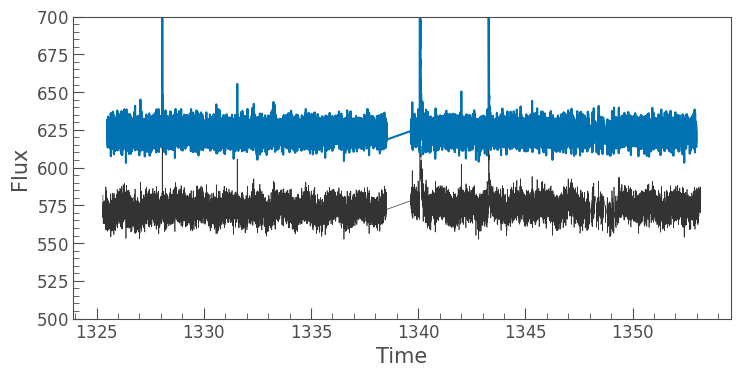

In [11]:
for i, path in enumerate(paths[:1]):
    print(path, "\n")
    path = f"{CWD}/custom_aperture/" + path
    cluster = f"{CWD}/flare_tables/2020_02_05_TESSUCDs"

    flc = read_custom_aperture_lc(path)

    flcd = flc.detrend("custom", func=custom_detrending)
    
    flcd = flcd.find_flares()
    
    write_flares_to_file(flcd, cluster)

    print("\nFinished TIC {} ({})\n------------------------------\n".format(flc.targetid, flc.campaign))
    flc.plot()
    plt.plot(flcd.time, flcd.detrended_flux+50)
    plt.ylim(500,700)
    
    max_ampl = 2*flcd.flares.ampl_rec.max()
    #print(max_ampl)
    min_dur = .5 * np.min(flcd.flares.tstop-flcd.flares.tstart)
    print(min_dur)
    for i in range(3):
        flce, fake_flc = flcd.sample_flare_recovery(inject_before_detrending=True, mode="custom",
                                                    func=custom_detrending,
                                                  iterations=5, fakefreq=1e-3, ampl=[1e-2, max_ampl],
                                                  dur=[min_dur/6., 0.1/6.], save=True,
                                                  path="{}{}_{:012d}_s{:04d}.csv".format(i,5,
                                                                                         flc.targetid,
                                                                                         flc.campaign))

    flcc = flce.characterize_flares( ampl_bins=2, dur_bins=2)

In [14]:
flcc = flce.characterize_flares( ampl_bins=2, dur_bins=2)
flcc.flares.T

,0,1
ampl_rec,2.42536,0.18353
cstart,81083,83396
cstop,81126,83416
ed_rec,1622.64,240.725
ed_rec_err,4.18317,4.33524
istart,9368,11653
istop,9411,11673
total_n_valid_data_points,17805,17805
tstart,1340.07,1343.28
tstop,1340.13,1343.31


In [5]:
# respath = f"{CWD}/flare_tables/2020_02_05_TESSUCDs_flares.csv"
# df = pd.read_csv(respath)
# df = df[df.ed_rec > 0] # keep only positive flare values
# df.to_csv(respath)

In [6]:
# a = pd.DataFrame()
# for i, lf in df.groupby("TIC"):
#     a.loc[i,"nflares"] = int(lf.TIC.count())
#     a.loc[i,"nsectors"] = int(len(lf.Campaign.unique()))
# a["flarespersec"] = a.nflares/a.nsectors
# a.sort_values(by="flarespersec",ascending=False)


In [7]:
# plt.figure(figsize=(16,5))
# markers =  ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
# for c, dfs in df.groupby("Campaign"):
#     plt.scatter(dfs.cstart, dfs.ampl_rec, label=f"{c}", marker=markers.pop())
# plt.legend(loc=(1.01,0))
# plt.title("cadence vs. flare amplitude by sector", fontsize=14);
# plt.yscale("log")
# plt.xlabel("cadence", fontsize=14)
# plt.ylabel("rel. amplitude", fontsize=14)
# plt.savefig("/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/plots/TESS_UCD_flares_21_11_2019.png", dpi=300)

In [8]:
# plt.figure(figsize=(16,5))
# markers =  ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'] *100
# for c, dfs in df.groupby("TIC"):
#     plt.scatter(dfs.cstart, dfs.ampl_rec, label=f"TIC {c}", marker=markers.pop())
# #plt.legend()
# plt.title("cadence vs. flare amplitude by target");
# plt.yscale("log")
# plt.xlabel("cadence")
# plt.ylabel("rel. amplitude")


In [9]:
df.shape

NameError: name 'df' is not defined

In [ ]:
# for i, path in enumerate(paths):
#     print(path, "\n")
#     path = f"{CWD}/custom_aperture/" + path
#     cluster = f"{CWD}/flare_tables/2019_11_13_TESSUCDs"

#     flc = read_custom_aperture_lc(path)
    
#     w = search_gaps_for_window_length(flc)
#     print(w)
#     flcd = custom_detrending(flc, d={flc.targetid:tuple(w)})

#     flcd = refine_detrended_flux_err(flcd)

#     flcd = flcd.find_flares()

#     write_flares_to_file(flcd, cluster)

#     print("\nFinished TIC {} ({})\n------------------------------\n".format(flc.targetid, flc.campaign))
